# Packaging Technical Analysis

What we want to do now is to have these technical analyses on command rather than going through all these codes.

Again, let's create a text file and name it TechnicalAnalysis.py

The first thing we do is we paste the following lines of code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [57]:
ticker = input('Please input the ticker you want to look at: ').upper()

start = '2017-01-01'
end = '2021-01-01'

stock = pdr.DataReader(ticker, 'yahoo', start, end)
data = stock['Adj Close']
volume = stock['Volume']
highs = stock['High']
lows = stock['Low']

Please input the ticker you want to look at:  aapl


Then we start with our moving averages; we have the following code:

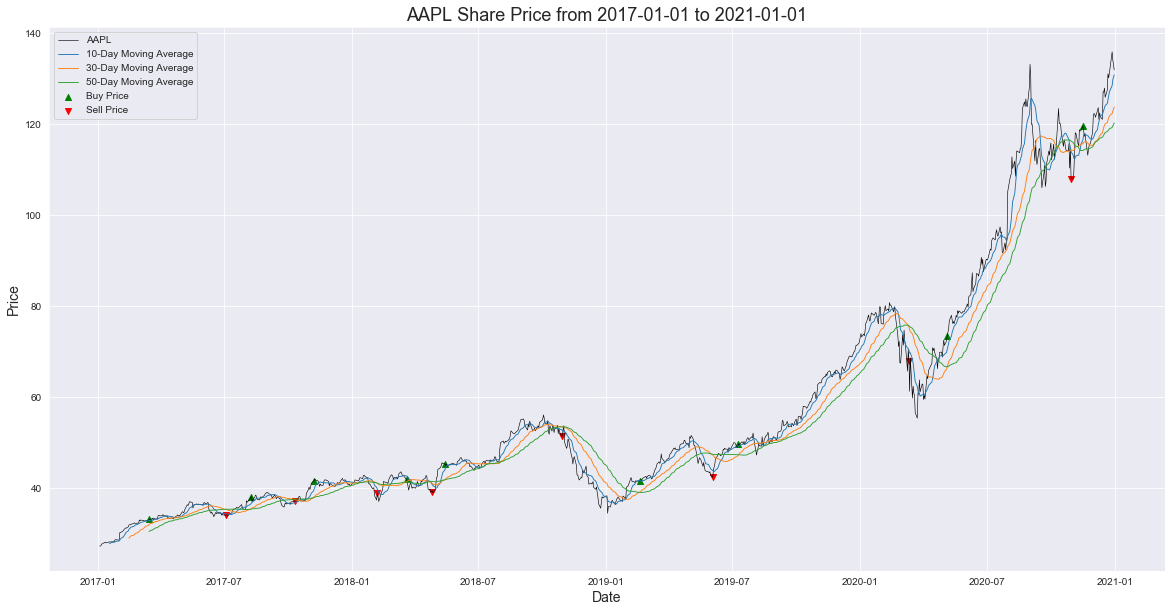

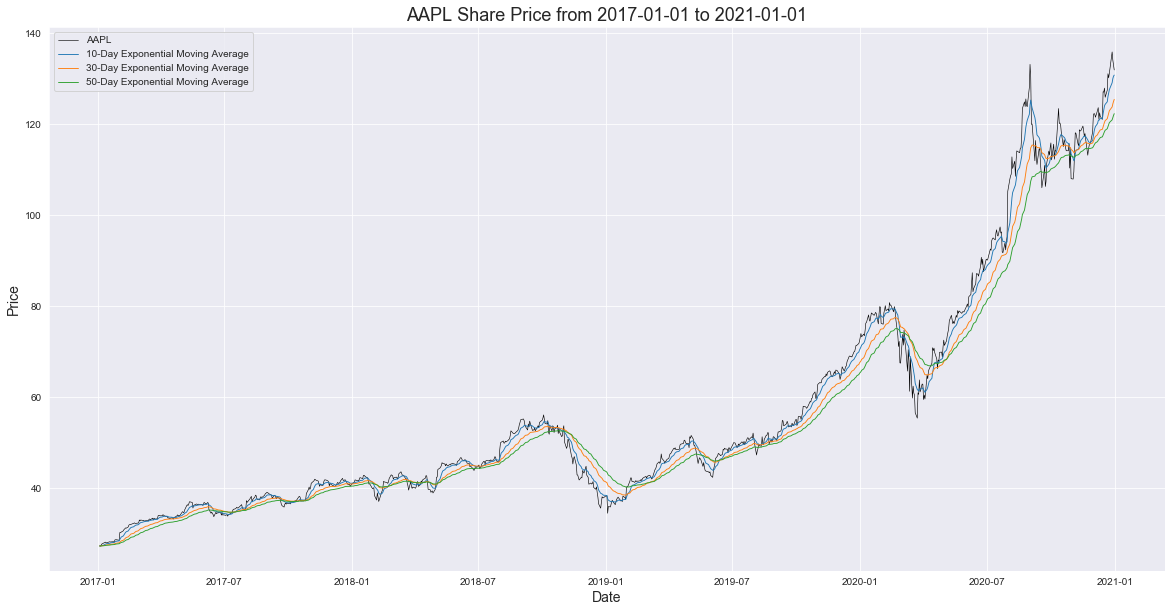

In [64]:
ma = [10, 30, 50]

# Simple Moving Average

sma_df = pd.DataFrame()
for x in ma:
    sma_df[f'{x}-Day Moving Average'] = data.rolling(window=x).mean()
    
def sma_buysell(data, dataframe):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    for i in range(0, len(data)):
        if dataframe[f'{ma[0]}-Day Moving Average'][i] > dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] > dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif dataframe[f'{ma[0]}-Day Moving Average'][i] < dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] < dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag=0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
    return(signal_buy_price, signal_sell_price)

buy, sell = sma_buysell(data, sma_df)
sma_df['Buy Signal'] = buy
sma_df['Sell Signal'] = sell

plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
plt.scatter(sma_df.index, sma_df['Buy Signal'], color='green', marker='^', label='Buy Price')
plt.scatter(sma_df.index, sma_df['Sell Signal'], color='red', marker='v', label='Sell Price')
for x in ma:
    plt.plot(sma_df[f'{x}-Day Moving Average'], label = f'{x}-Day Moving Average', alpha=1, lw=0.9)
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();

# Exponential Moving Average

EMA = pd.DataFrame()
for x in ma:
    EMA[f'{x}-Day EMA'] = data.ewm(span=x, adjust=False).mean()
    # The ewm() function is the exponential weighted moving function.
    # This works in the same way as the rolling function but it is exponentially weighted.
        # This just means the more recent data has a higher weighting and are a more significant factor
        # in determining the data for the next day.
    # The span is similar to the window parameter in the rolling function.
    
    # The adjust parameter is set to False as for this example we are not bothered with an imperfect balance of data
    # at the start of our sample.
    # If adjust was set to True (default) the function would try to adjust the weighting for the start of the data.

plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
# k for color commonly denotes black
for x in ma:
    plt.plot(EMA[f'{x}-Day EMA'], label = f'{x}-Day Exponential Moving Average', alpha=1, lw=0.9)
    # We use a for loop here to get the labels to show on the legend
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();

Let's put these two into a function (be sure to add in the ticker parameter too):

In [65]:
def moving_average(data, ticker, ma=[10, 30, 50] ,simple=True, start='2017-01-01', end='2021-01-01'):

    if simple == True:
    # Here we set the parameter to say that we want simple moving average
        # NOTE: Here we have simple == True - 2 equal signs
        # The 2 equal signs means "is" and this is always used when we are working
        # with Booleans (True and False)
    
        sma_df = pd.DataFrame()
        for x in ma:
            sma_df[f'{x}-Day Moving Average'] = data.rolling(window=x).mean()

        def sma_buysell(data, dataframe):
            signal_buy_price = []
            signal_sell_price = []
            flag = -1
            for i in range(0, len(data)):
                if dataframe[f'{ma[0]}-Day Moving Average'][i] > dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] > dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=1:
                    signal_buy_price.append(data[i])
                    signal_sell_price.append(np.nan)
                    flag = 1
                elif dataframe[f'{ma[0]}-Day Moving Average'][i] < dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] < dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=0:
                    signal_buy_price.append(np.nan)
                    signal_sell_price.append(data[i])
                    flag=0
                else:
                    signal_buy_price.append(np.nan)
                    signal_sell_price.append(np.nan)
                    
            return(signal_buy_price, signal_sell_price)

        buy, sell = sma_buysell(data, sma_df)
        sma_df['Buy Signal'] = buy
        sma_df['Sell Signal'] = sell

        plt.figure(figsize=(20,10))
        plt.plot(data, lw=0.6, label = f'{ticker} Share Price', color='k')
        plt.scatter(sma_df.index, sma_df['Buy Signal'], color='green', marker='^', label='Buy Price')
        plt.scatter(sma_df.index, sma_df['Sell Signal'], color='red', marker='v', label='Sell Price')
        for x in ma:
            plt.plot(sma_df[f'{x}-Day Moving Average'], label = f'{x}-Day Moving Average', alpha=1, lw=0.9)
        plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.legend()
        plt.show();
        
        return sma_df

    else:
        EMA = pd.DataFrame()
        for x in ma:
            EMA[f'{x}-Day EMA'] = data.ewm(span=x, adjust=False).mean()
            
        def ema_buysell(data, dataframe):
            signal_buy_price = []
            signal_sell_price = []
            flag = -1
            for i in range(0, len(data)):
                if dataframe[f'{ma[0]}-Day EMA'][i] > dataframe[f'{ma[1]}-Day EMA'][i] and dataframe[f'{ma[1]}-Day EMA'][i] > dataframe[f'{ma[2]}-Day EMA'][i] and flag !=1:
                    signal_buy_price.append(data[i])
                    signal_sell_price.append(np.nan)
                    flag = 1
                elif dataframe[f'{ma[0]}-Day EMA'][i] < dataframe[f'{ma[1]}-Day EMA'][i] and dataframe[f'{ma[1]}-Day EMA'][i] < dataframe[f'{ma[2]}-Day EMA'][i] and flag !=0:
                    signal_buy_price.append(np.nan)
                    signal_sell_price.append(data[i])
                    flag=0
                else:
                    signal_buy_price.append(np.nan)
                    signal_sell_price.append(np.nan)
                    
            return(signal_buy_price, signal_sell_price)

        buy, sell = ema_buysell(data, EMA)
        EMA['Buy Signal'] = buy
        EMA['Sell Signal'] = sell
        plt.figure(figsize=(20,10))
        plt.plot(data, lw=0.6, label = f'{ticker} Share Price', color='k')
        plt.scatter(EMA.index, EMA['Buy Signal'], color='green', marker='^', label='Buy Price')
        plt.scatter(EMA.index, EMA['Sell Signal'], color='red', marker='v', label='Sell Price')
        for x in ma:
            plt.plot(EMA[f'{x}-Day EMA'], label = f'{x}-Day Exponential Moving Average', alpha=1, lw=0.9)
            # We use a for loop here to get the labels to show on the legend
        plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.legend()
        plt.show();
        
    return EMA

We have simply done an if statement and returned the dataframe of data for the simple moving average (sma_df) and exponential moving average (EMA) in either conditions.

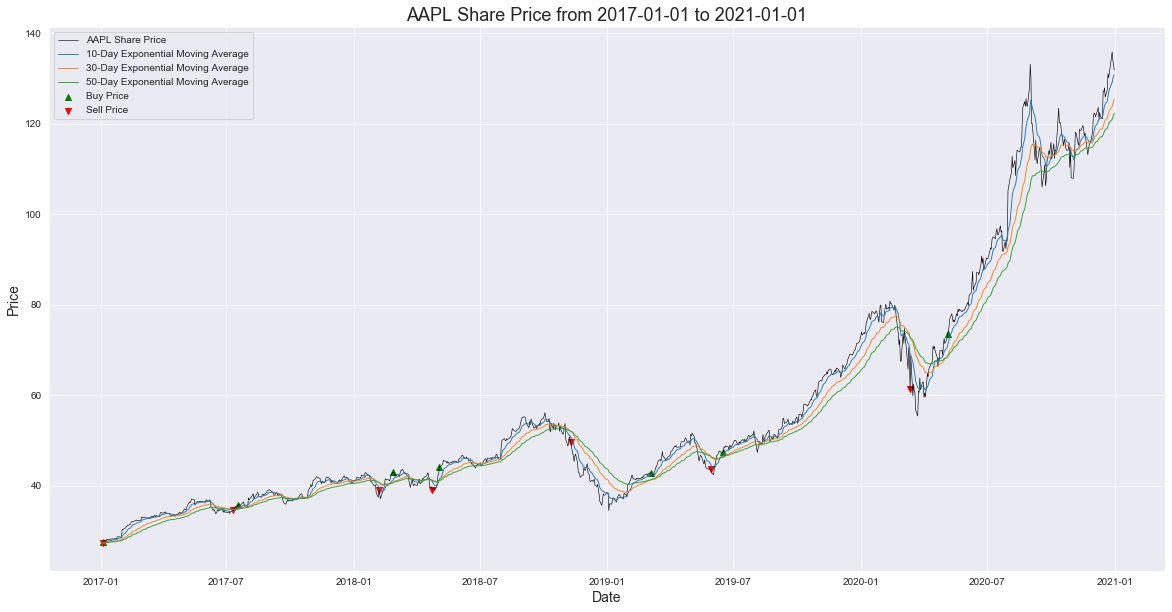

In [68]:
ema = moving_average(data, ticker, simple=False)

If we didn't want the plot when we run the function, we can use a class function to specify what we want inside the function, which we will dive into later on.

Now let's paste the above code into the TechnicalAnalysis.py

We now do the same thing for the On-Balance Volume, which should have the following code:

In [69]:
def on_balance_volume(data, ticker, volume):
    def obv_buysell(data, obv_data, obv_ewm_data):
        signal_buy_price = []
        signal_sell_price = []
        flag = -1
        for i in range(0, len(data)):
            if obv_data[i] > obv_ewm_data[i] and flag != 1:
                signal_buy_price.append(data[i])
                signal_sell_price.append(np.nan)
                flag = 1
            elif obv_data[i] < obv_ewm_data[i] and flag != 0:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(data[i])
                flag = 0
            else:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(np.nan)
        return(signal_buy_price, signal_sell_price)

    obv = []
    obv.append(0)
    for i in range(1, len(data)):
        if data[i] > data[i-1]:
            obv.append(obv[-1] + volume[i])
        elif data[i] < data[i-1]:
            obv.append([-1] - volume[i])
        else:
            obv.append(obv[-1])  

    obv_df = pd.DataFrame()

    obv_df['Date'] = data.index
    obv_df = obv_df.set_index(obv_df['Date'])
    obv_df = obv_df.drop('Date', axis=1)
    obv_df['OBV'] = obv
    obv_df['OBV EMA'] = obv_df['OBV'].ewm(span=20).mean()

    buy, sell = obv_buysell(data, obv_df['OBV'], obv_df['OBV EMA'])
    obv_df['Buy Signal'] = buy
    obv_df['Sell Signal'] = sell
    ## OBV Plot
    fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios': [2, 0.5]})
    fig.subplots_adjust(hspace=0, wspace=0)
    ax[0].plot(data, label = f'{ticker} Share Price')
    ax[0].set_title(f'{ticker} Share Price', fontsize=16)
    ax[0].set_ylabel('Share Price', fontsize=14)

    ax[0].scatter(data.index, obv_df['Buy Signal'], marker='^', color='green', label='Buy Indicator')
    ax[0].scatter(data.index, obv_df['Sell Signal'], marker='v', color='red', label='Sell Indicator')
    # We add our code into our plot
    
    ax[0].legend()

    ax[1].plot(obv_df['OBV EMA'], color='red', alpha=1, label='OBV Exponential MA')
    ax[1].plot(obv_df['OBV'], color='skyblue', alpha=1, label='OBV')
    ax[1].set_title('On-Balance Volume', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].legend(loc='upper left')
    
    plt.margins(x=0)
    plt.tight_layout()
    plt.show();
    
    return obv_df

Again, simply giving a definition line first, and returning the dataframe below.

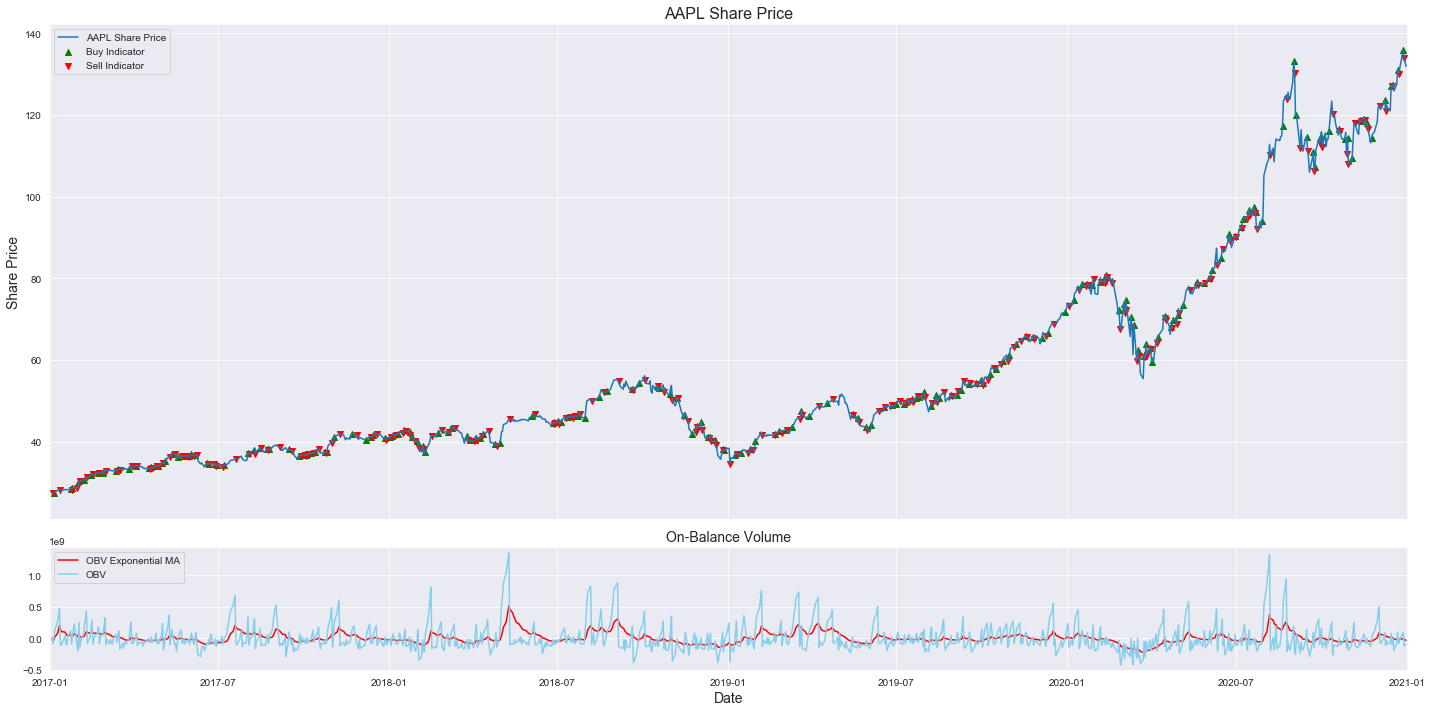

In [70]:
obv = on_balance_volume(data, ticker, volume)

Moving onto Relative-Strength Index, we should have the following code:

In [71]:
def relative_strength_index(data, ticker, ceiling=80, floor=20, interval=14):

    delta = data.diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=interval).mean()
    avg_loss = abs(down.rolling(window=interval).mean())
    rsi = 100.0 - (100.0 / (1.0 + avg_gain / avg_loss))
    rsi_dataframe = pd.DataFrame({'RSI': rsi})
    rsi_dataframe[f'RSI {floor}%'] = rsi_dataframe[rsi_dataframe['RSI'] < floor]['RSI']
    rsi_dataframe[f'RSI {ceiling}%'] = rsi_dataframe[rsi_dataframe['RSI'] > ceiling]['RSI']

    def rsi_signal(data, rsi_data, floor=floor, ceiling=floor):
        data = data[1:]
        signal_buy_price = []
        signal_sell_price = []
        rsi_signal_buy_price = []
        rsi_signal_sell_price = []

        flag = -1

        # This for loop is for the share price data and RSI data.
        for i in range(0, len(rsi_data)):
            if rsi_data[i] >= ceiling and flag != 1:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(data[i])
                rsi_signal_buy_price.append(np.nan)
                rsi_signal_sell_price.append(rsi_data[i])
                flag = 1

            elif rsi_data[i] <= floor and flag != 0:
                signal_buy_price.append(data[i])
                signal_sell_price.append(np.nan)
                rsi_signal_buy_price.append(rsi_data[i])
                rsi_signal_sell_price.append(np.nan)
                flag = 0

            else:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(np.nan)
                rsi_signal_sell_price.append(np.nan)
                rsi_signal_buy_price.append(np.nan)

        return signal_buy_price, signal_sell_price, rsi_signal_buy_price, rsi_signal_sell_price

    buy, sell, rsi_buy, rsi_sell = rsi_signal(data, rsi_dataframe['RSI'])
    rsi_dataframe[f'{ticker} Buy Price'] = buy
    rsi_dataframe[f'{ticker} Sell Price'] = sell
    rsi_dataframe[f'{ticker} RSI Buy Price'] = rsi_buy
    rsi_dataframe[f'{ticker} RSI Sell Price'] = rsi_sell

    rsi_dataframe[f'{ticker} Share Price'] = data[1:]

    fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})
    fig.subplots_adjust(hspace=0.06, wspace=0)
    ax[0].plot(rsi_dataframe[f'{ticker} Share Price'], label=f"{ticker}'s Share Price", c='skyblue')
    ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Buy Price'], marker='^', c='g', label='Buy Indicator')
    ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Sell Price'], marker='v', c='r', label='Sell Indicator')
    ax[0].set_title(f'{ticker}\'s Share Price and RSI Indicators', fontsize=16)
    ax[0].set_ylabel('Share Price', fontsize=14)
    ax[0].legend(loc='upper left')

    ax[1].plot(rsi_dataframe['RSI'], label=f"{ticker}'s RSI Value", color='skyblue')
    ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.8)
    ax[1].axhline(y=floor, ls='--', c='g', alpha=0.8)
    ax[1].axhline(y=ceiling - 10, ls='--', c='orange', alpha=0.8)
    ax[1].axhline(y=floor + 10, ls='--', c='orange', alpha=0.8)

    ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Buy Price'], marker='^', c='g')
    ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Sell Price'], marker='v', c='r')
    ax[1].set_title(f'{ticker}\'s Relative Strength Index', fontsize=14)
    ax[1].set_ylabel('Relative Strength Index', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].legend(loc='upper left')

    plt.margins(x=0)
    plt.show();
    
    return rsi_dataframe

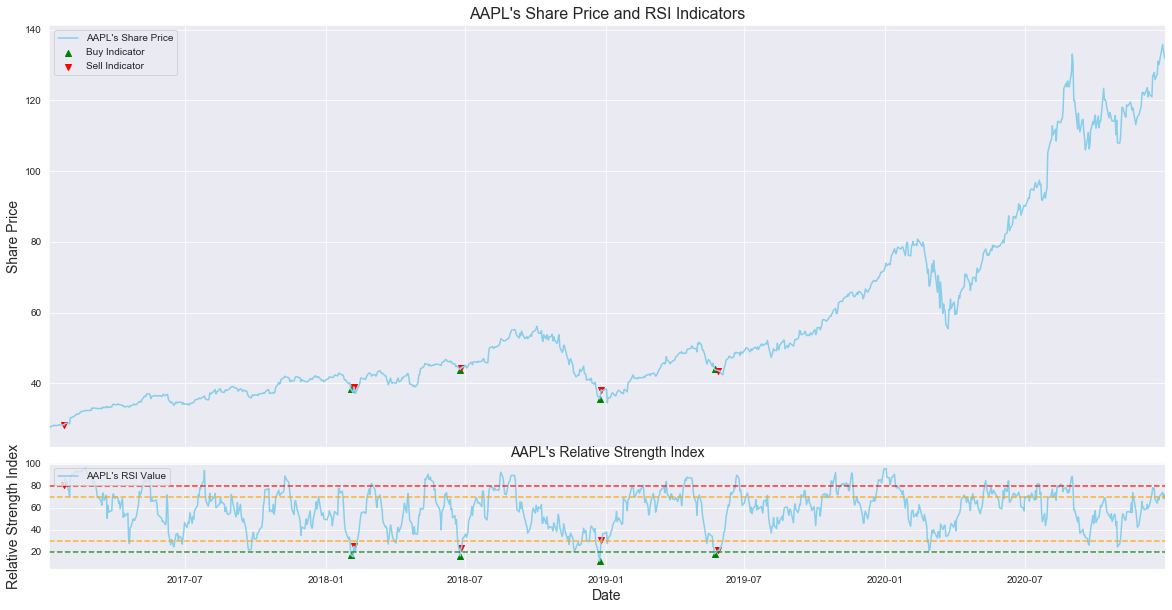

In [72]:
rsi = relative_strength_index(data, ticker)

Money Fund Index:

In [73]:
def money_fund_index(data, ticker, highs, lows, volume, period=14, floor = 20, ceiling = 80):

    typical_price = (highs + lows + data) / 3
    raw_money_flow = typical_price * volume
    positive_flow = []
    negative_flow = []
    
    for i in range(1, len(typical_price)):
        if typical_price[i] > typical_price[i - 1]:
            positive_flow.append(raw_money_flow[i - 1])
            negative_flow.append(0)
        elif typical_price[i] < typical_price[i - 1]:
            positive_flow.append(0)
            negative_flow.append(raw_money_flow[i - 1])
        else:
            positive_flow.append(0)
            negative_flow.append(0)
            
    positive_money_flow = []
    negative_money_flow = []
    
    for i in range(period - 1, len(positive_flow)):
        positive_money_flow.append(sum(positive_flow[i + 1 - period: i + 1]))
    for i in range(period - 1, len(negative_flow)):
        negative_money_flow.append(sum(negative_flow[i + 1 - period: i + 1]))
        
    mfi = 100 * np.array(positive_money_flow) / (np.array(positive_money_flow) + np.array(negative_money_flow))

    # Buy/Sell Function
    def mfi_buysell(data, ticker, highs, lows, mfi=mfi):
        data = data[period:]
        signal_buy_price = []
        signal_sell_price = []
        mfi_signal_buy_price = []
        mfi_signal_sell_price = []

        flag = -1

        for i in range(0, len(mfi)):
            if mfi[i] >= highs and flag != 1:
                signal_buy_price.append(np.nan)
                mfi_signal_buy_price.append(np.nan)

                signal_sell_price.append(data[i])
                mfi_signal_sell_price.append(mfi[i])
                flag = 1

            elif mfi[i] <= lows and flag != 0:
                signal_buy_price.append(data[i])
                mfi_signal_buy_price.append(mfi[i])

                signal_sell_price.append(np.nan)
                mfi_signal_sell_price.append(np.nan)
                flag = 0

            else:
                signal_buy_price.append(np.nan)
                mfi_signal_buy_price.append(np.nan)

                signal_sell_price.append(np.nan)
                mfi_signal_sell_price.append(np.nan)

        return signal_buy_price, signal_sell_price, mfi_signal_buy_price, mfi_signal_sell_price

    # The DataFrame
    buy, sell, mfi_buy, mfi_sell = mfi_buysell(data, ticker, ceiling, floor, mfi=mfi)

    mfi_dataframe = pd.DataFrame({
        'MFI': mfi,
        f'{ticker} Buy Price': buy,
        f'{ticker} Sell Price': sell,
        f'{ticker} MFI Buy Price': mfi_buy,
        f'{ticker} MFI Sell Price': mfi_sell
    })

    mfi_dataframe[f'{ticker} Index'] = data.index[period:]
    mfi_dataframe = mfi_dataframe.set_index(mfi_dataframe[f'{ticker} Index'])
    mfi_dataframe = mfi_dataframe.drop(columns = [f'{ticker} Index'])
    mfi_dataframe[f'{ticker} Share Price'] = data

    # Plot
    fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})

    ax[0].plot(mfi_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
    ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Buy Price'], marker='^', c='g', label='Buy Indicator')
    ax[0].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} Sell Price'], marker='v', c='r', label='Sell Indicator')
    ax[0].set_title(f'{ticker}\'s MFI Plot', fontsize=18)
    ax[0].set_ylabel('Share Price', fontsize=14)
    ax[0].legend(loc='upper left')

    ax[1].plot(mfi_dataframe['MFI'], c='skyblue', label=f'{ticker}\'s MFI Value')
    ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Buy Price'], marker='^', c='g')
    ax[1].scatter(mfi_dataframe.index, mfi_dataframe[f'{ticker} MFI Sell Price'], marker='v', c='r')
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylabel('MFI Value', fontsize=14)
    ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.7)
    ax[1].axhline(y=floor, ls='--', c='g', alpha=0.7)
    ax[1].legend(loc='upper left')

    plt.tight_layout()
    plt.margins(x=0)
    plt.show();
    
    return mfi_dataframe

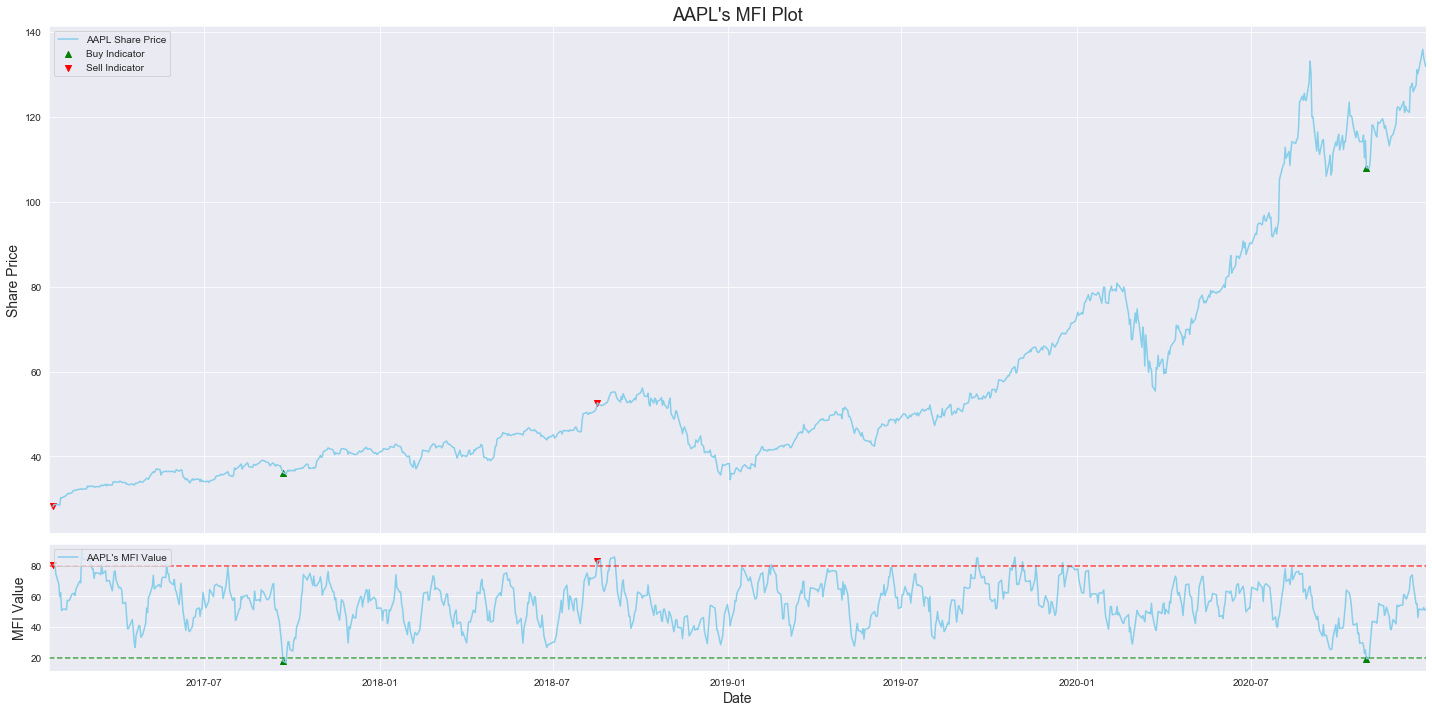

In [74]:
mfi = money_fund_index(data, ticker, highs, lows, volume)

Stochastic Oscillator:

In [77]:
def stochastic_oscillator(data, ticker, highs, lows, period=14, floor=20, ceiling=80, crossover=False):

    lows_stochastic = lows.rolling(window=period).min()
    highs_stochastic = highs.rolling(window=period).max()
    fast_stochastic = [(100 * (data[i] - lows_stochastic[i]) / (highs_stochastic[i] - lows_stochastic[i])) for i in range(len(data))]
    stochastic_dataframe = pd.DataFrame({'Fast Stochastic (%K)': fast_stochastic})
    slow_stochastic = stochastic_dataframe['Fast Stochastic (%K)'].rolling(window=3).mean()
    stochastic_dataframe['Slow Stochastic (%D)'] = slow_stochastic

    # Data Normalisation
    def normalise_data(data):
        return (data - np.min(data))/(np.max(data) - np.min(data))

    stochastic_dataframe['Fast Stochastic (%K)'] = normalise_data(stochastic_dataframe['Fast Stochastic (%K)']) * 100
    stochastic_dataframe['Slow Stochastic (%D)'] = normalise_data(stochastic_dataframe['Slow Stochastic (%D)']) * 100
    stochastic_dataframe

    # Stochastic Floor/Ceiling Buy/Sell function
    def stochastic_fc_buysell(data, floor, ceiling, stochastic):
        signal_buy_price = []
        signal_sell_price = []
        flag = -1

        for i in range(len(data)):
            if stochastic[i] <= floor and flag != 1:
                signal_buy_price.append(data[i])
                signal_sell_price.append(np.nan)
                flag = 1
                
            elif stochastic[i] >= ceiling and flag != 0:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(data[i])
                flag = 0
                
            else:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(np.nan)

        return signal_buy_price, signal_sell_price

    # Stochastic Crossover Buy/Sell function
    def stochastic_x_buysell(data, fast_stochastic, slow_stochastic):
        signal_buy_price = []
        signal_sell_price = []
        flag = -1

        for i in range(0, len(data)):
            if slow_stochastic[i] > fast_stochastic[i] and flag != 1:
                signal_buy_price.append(data[i])
                signal_sell_price.append(np.nan)
                flag = 1
                
            elif slow_stochastic[i] < fast_stochastic[i] and flag != 0:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(data[i])
                flag = 0
                
            else:
                signal_buy_price.append(np.nan)
                signal_sell_price.append(np.nan)

        return signal_buy_price, signal_sell_price

    buy, sell = stochastic_fc_buysell(data, floor, ceiling, slow_stochastic)
    xbuy, xsell = stochastic_x_buysell(data, fast_stochastic, slow_stochastic)

    stochastic_dataframe['Stochastic F/C Buy Price'] = buy
    stochastic_dataframe['Stochastic F/C Sell Price'] = sell
    stochastic_dataframe['Stochastic Crossover Buy Price'] = xbuy
    stochastic_dataframe['Stochastic Crossover Sell Price'] = xsell
    stochastic_dataframe['Index'] = data.index
    stochastic_dataframe = stochastic_dataframe.set_index('Index')
    stochastic_dataframe[f'{ticker} Share Price'] = data

    # Plot
    fig, ax = plt.subplots(3, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5, 0.5]})
    ax[0].plot(stochastic_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
    
    # Here we add the Crossover or Floor/Ceiling Option
    if crossover == False:
        ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Buy Price'], marker='^', c='g')
        ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Sell Price'], marker='v', c='r')
        ax[0].set_title(f'Stochastic Floor/Ceiling Strategy Indicator for {ticker}', fontsize=16)
    else:
        ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic Crossover Buy Price'], marker='^', c='g')
        ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic Crossover Sell Price'], marker='v', c='r')
        ax[0].set_title(f'Stochastic Crossover Strategy Indicator for {ticker}', fontsize=16)
        
    ax[0].set_ylabel('Share Price', fontsize=14)
    ax[0].legend(loc='upper left')
    
    ax[1].plot(stochastic_dataframe['Fast Stochastic (%K)'], c='r', alpha=0.5, label='Fast Stochastic (%K)')
    ax[1].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='g', alpha=0.5, label='Slow Stochastic (%D)')
    ax[1].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
    ax[1].axhline(y=floor, c='g', ls ='--', alpha=0.7)
    ax[1].axhline(y=100, c='k', ls = '--', alpha=0.7)
    ax[1].axhline(y=50, c='orange', ls = '--', alpha=0.7)
    ax[1].axhline(y=0, c='k', ls = '--', alpha=0.7)
    ax[1].set_ylabel('Stochastic Value', fontsize=14)
    ax[1].set_title(f'Stochastic Crossover Strategy for {ticker}', fontsize=16)
    ax[1].legend(loc='upper left')

    ax[2].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='skyblue', label='Slow Stochastic (%D)')
    ax[2].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
    ax[2].axhline(y=floor, c='g', ls ='--', alpha=0.7)
    ax[2].axhline(y=100, c='k', ls = '--', alpha=0.7)
    ax[2].axhline(y=50, c='orange', ls = '--', alpha=0.7)
    ax[2].axhline(y=0, c='k', ls = '--', alpha=0.7)
    ax[2].set_ylabel('Stochastic Value', fontsize=14)
    ax[2].set_xlabel('Date', fontsize=14)
    ax[2].set_title(f'Stochastic Floor/Ceiling Strategy for {ticker}', fontsize=16)
    ax[2].legend(loc='upper left')

    plt.subplots_adjust(hspace=0)
    plt.margins(x=0)
    plt.tight_layout()
    plt.show();
    
    return stochastic_dataframe

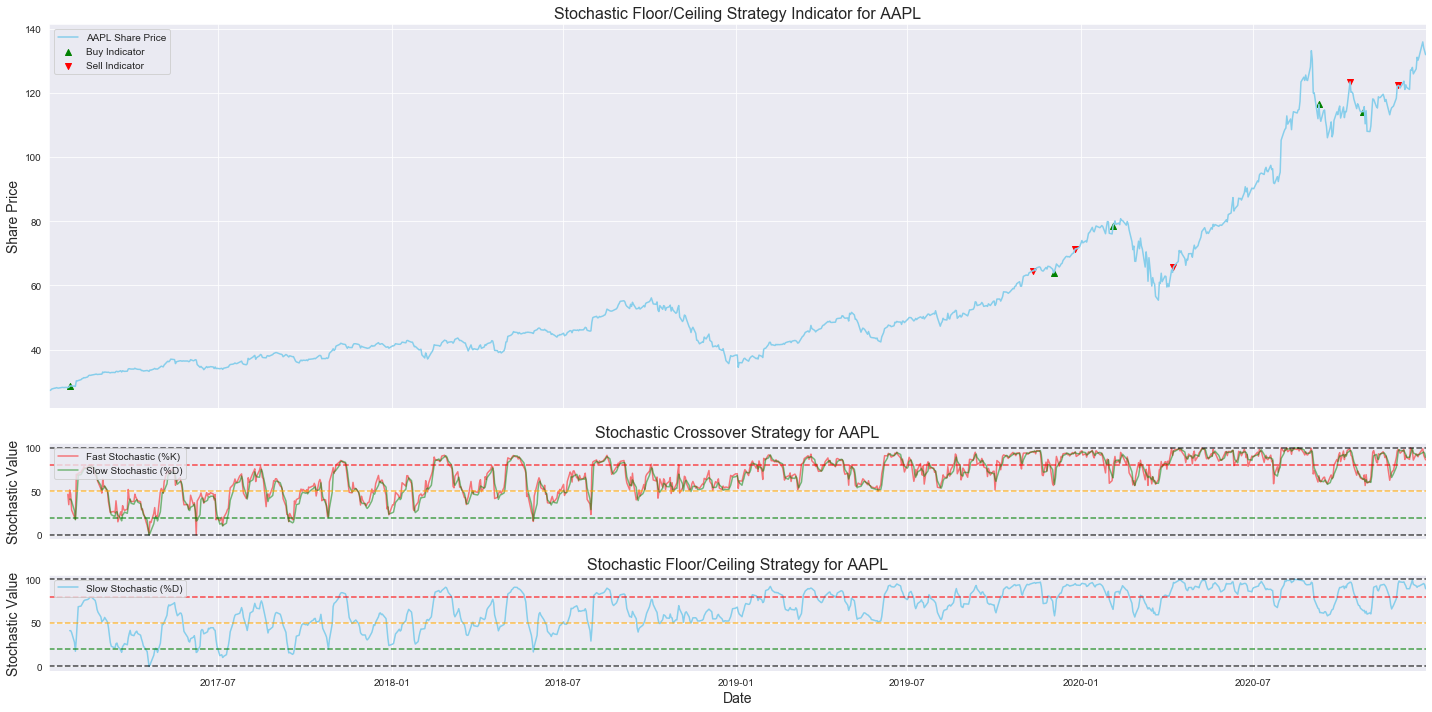

In [78]:
stochastic_oscillator_dataframe = stochastic_oscillator(data, ticker, highs, lows)

And that's it!

Our TechnicalAnalysis.py should now contain all the relevant codes (a copy is provided just in case).

Now we can try it out ourselves.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [3]:
ticker = input('Please input the ticker you want to look at: ').upper()

start = '2017-01-01'
end = '2021-01-01'

stock = pdr.DataReader(ticker, 'yahoo', start, end)
data = stock['Adj Close']
volume = stock['Volume']
highs = stock['High']
lows = stock['Low']

Please input the ticker you want to look at:  AAPL


In [4]:
import TechnicalAnalysis as ta

Let's check how it works:

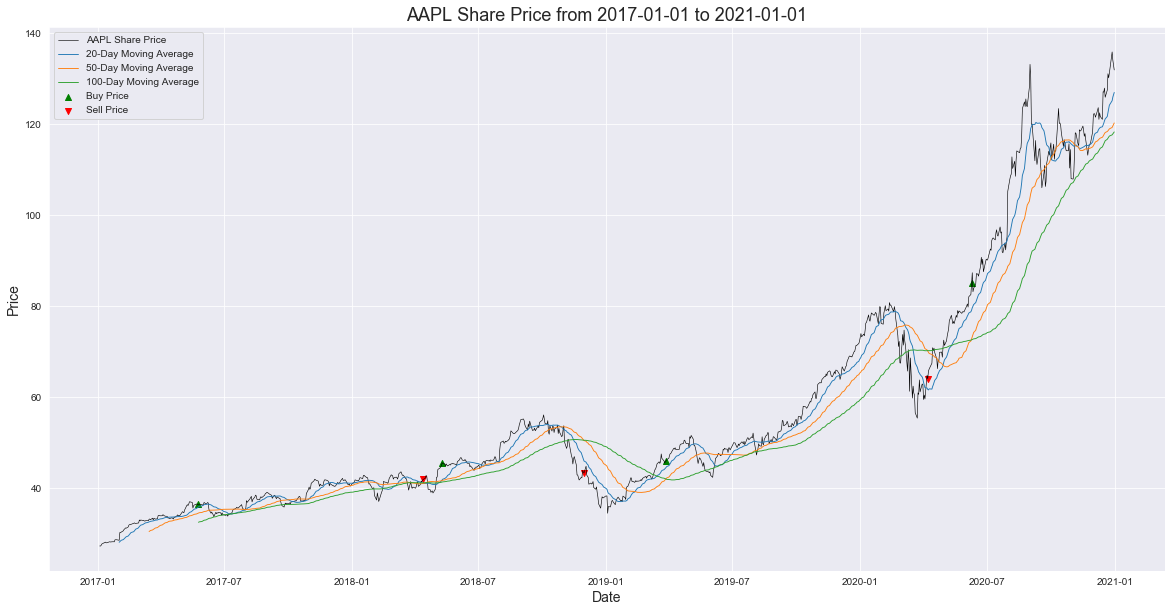

In [5]:
simple_moving_average = ta.moving_average(data, ticker, ma=[20, 50, 100])

In [6]:
simple_moving_average

,20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,Buy Signal,Sell Signal
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,124.137718,118.940340,117.363766,NaN,NaN
2020-12-28,125.136561,119.262115,117.632259,NaN,NaN
2020-12-29,125.922714,119.581247,117.844633,NaN,NaN


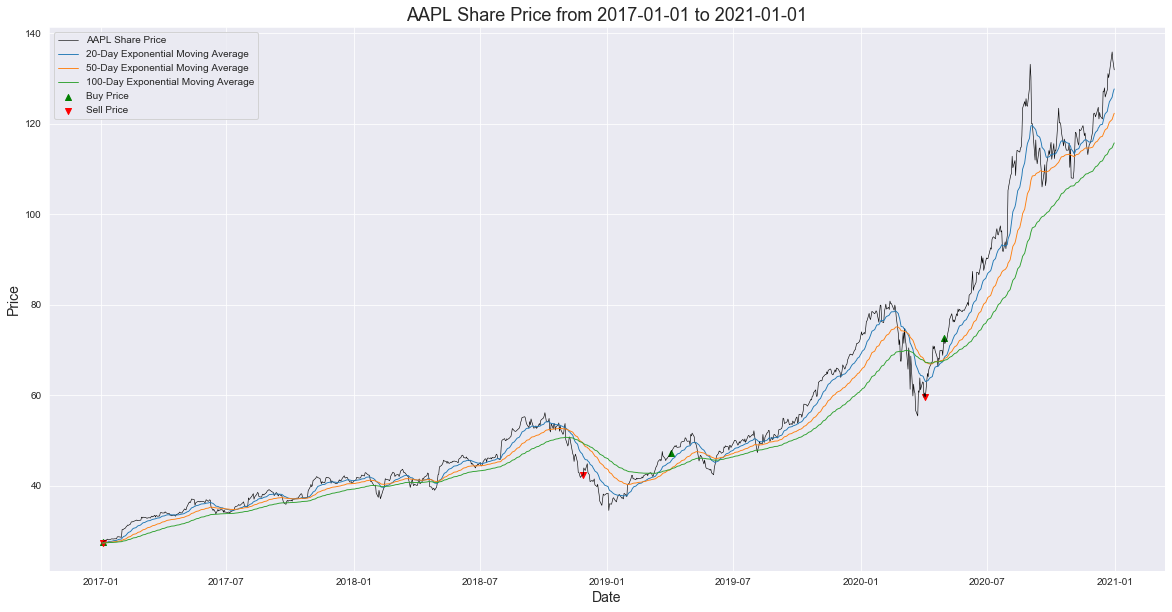

In [7]:
exponential_moving_average = ta.moving_average(data, ticker, ma=[20, 50, 100], simple=False)

In [8]:
exponential_moving_average

,20-Day EMA,50-Day EMA,100-Day EMA,Buy Signal,Sell Signal
Date,,,,,
2017-01-03,27.332476,27.332476,27.332476,NaN,NaN
2017-01-04,27.329562,27.331276,27.331870,NaN,27.301878
2017-01-05,27.340148,27.335568,27.334025,27.440716,NaN
2017-01-06,27.378861,27.351688,27.342196,NaN,NaN
2017-01-09,27.438091,27.377142,27.355237,NaN,NaN
...,...,...,...,...,...
2020-12-24,124.796050,120.320765,114.251178,NaN,NaN
2020-12-28,125.849046,120.929853,114.678927,NaN,NaN
2020-12-29,126.629484,121.444119,115.062386,NaN,NaN


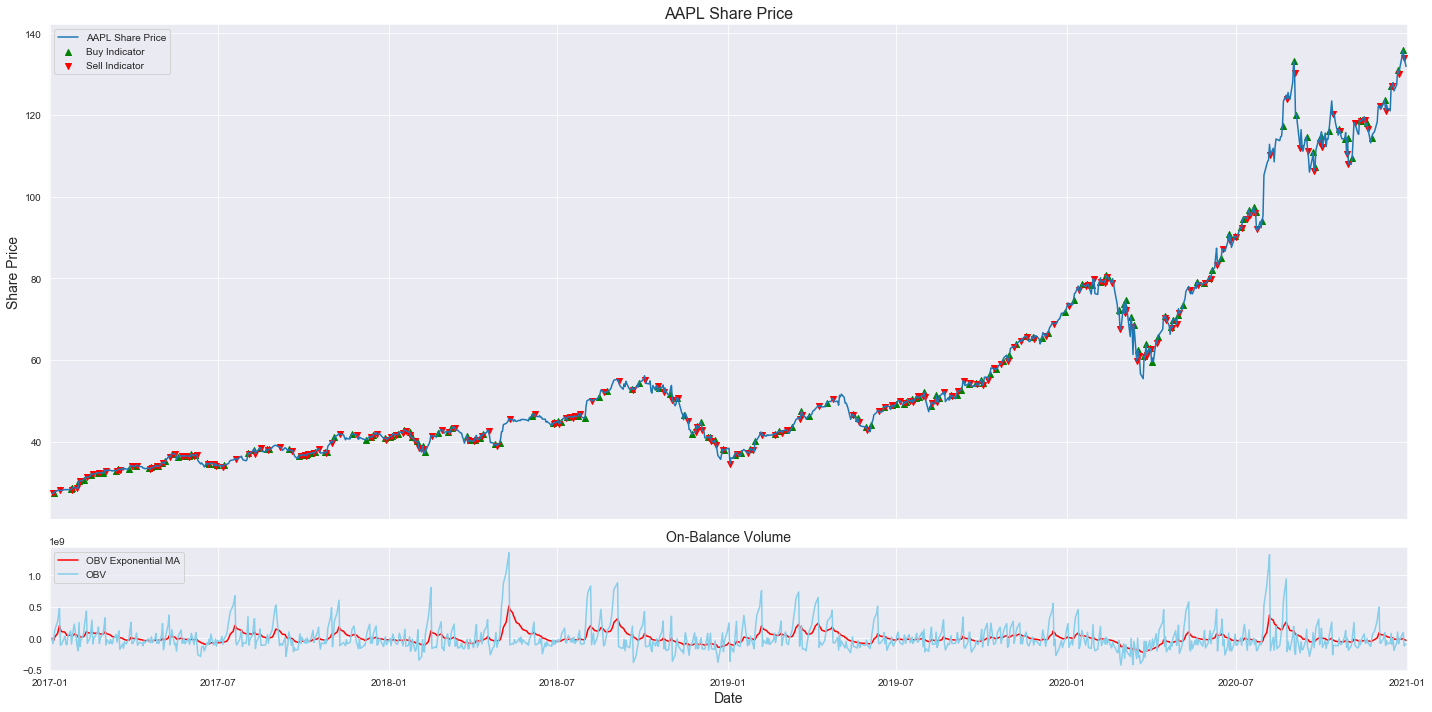

In [9]:
obv = ta.on_balance_volume(data, ticker, volume)

In [10]:
obv

,OBV,OBV EMA,Buy Signal,Sell Signal
Date,,,,
2017-01-03,0,0.000000e+00,NaN,NaN
2017-01-04,[-84472401.0],-4.434801e+07,NaN,27.301878
2017-01-05,[4301999.0],-2.648402e+07,27.440716,NaN
2017-01-06,[131309599.0],1.906856e+07,NaN,NaN
2017-01-09,[265557199.0],7.869206e+07,NaN,NaN
...,...,...,...,...
2020-12-24,[-33293601.0],-1.680046e+07,NaN,NaN
2020-12-28,[91192599.0],-6.515407e+06,135.852509,NaN
2020-12-29,[-121047301.0],-1.742321e+07,NaN,134.043640


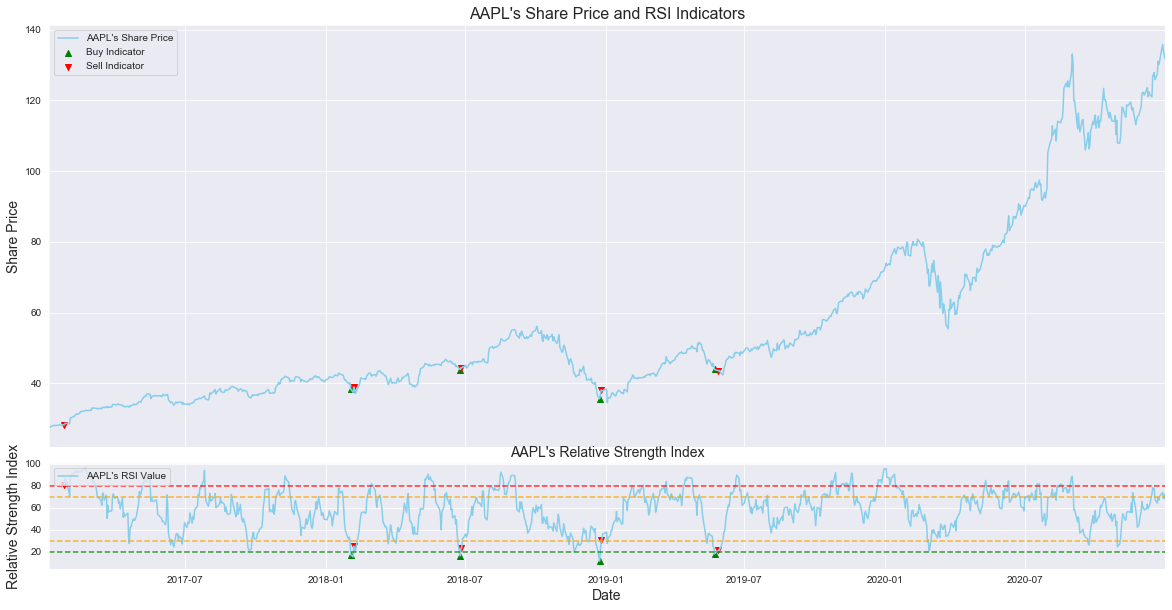

In [11]:
rsi = ta.relative_strength_index(data, ticker)

In [12]:
rsi

,RSI,RSI 20%,RSI 80%,AAPL Buy Price,AAPL Sell Price,AAPL RSI Buy Price,AAPL RSI Sell Price,AAPL Share Price
Date,,,,,,,,
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.301878
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.440716
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.746634
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000778
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.029024
...,...,...,...,...,...,...,...,...
2020-12-24,70.334692,NaN,NaN,NaN,NaN,NaN,NaN,131.161407
2020-12-28,73.856923,NaN,NaN,NaN,NaN,NaN,NaN,135.852509
2020-12-29,68.526966,NaN,NaN,NaN,NaN,NaN,NaN,134.043640


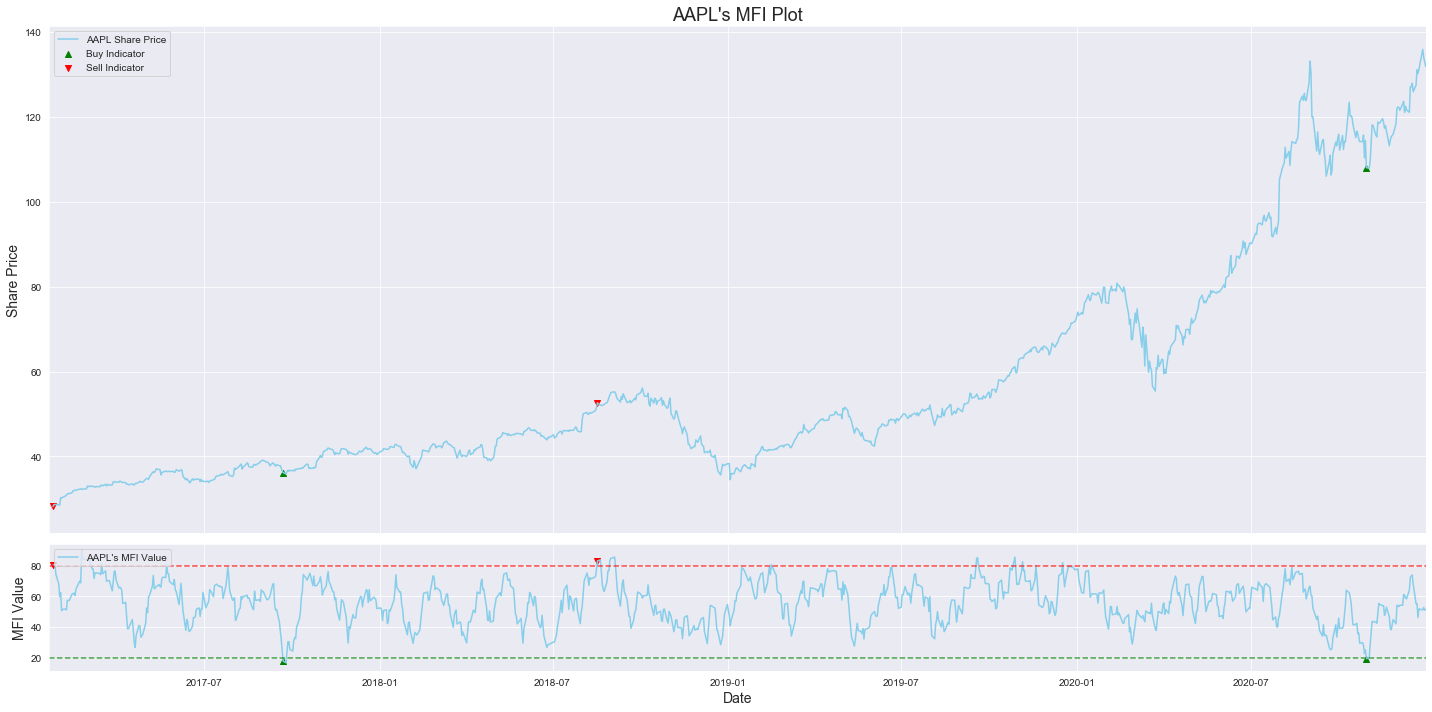

In [13]:
mfi = ta.money_fund_index(data, ticker, highs, lows, volume)

In [14]:
mfi

,MFI,AAPL Buy Price,AAPL Sell Price,AAPL MFI Buy Price,AAPL MFI Sell Price,AAPL Share Price
AAPL Index,,,,,,
2017-01-24,80.552304,NaN,28.231396,NaN,80.552304,28.231396
2017-01-25,80.313149,NaN,NaN,NaN,NaN,28.680855
2017-01-26,80.944295,NaN,NaN,NaN,NaN,28.694979
2017-01-27,74.330995,NaN,NaN,NaN,NaN,28.697332
2017-01-30,68.135549,NaN,NaN,NaN,NaN,28.622023
...,...,...,...,...,...,...
2020-12-24,51.729342,NaN,NaN,NaN,NaN,131.161407
2020-12-28,51.146834,NaN,NaN,NaN,NaN,135.852509
2020-12-29,52.683539,NaN,NaN,NaN,NaN,134.043640


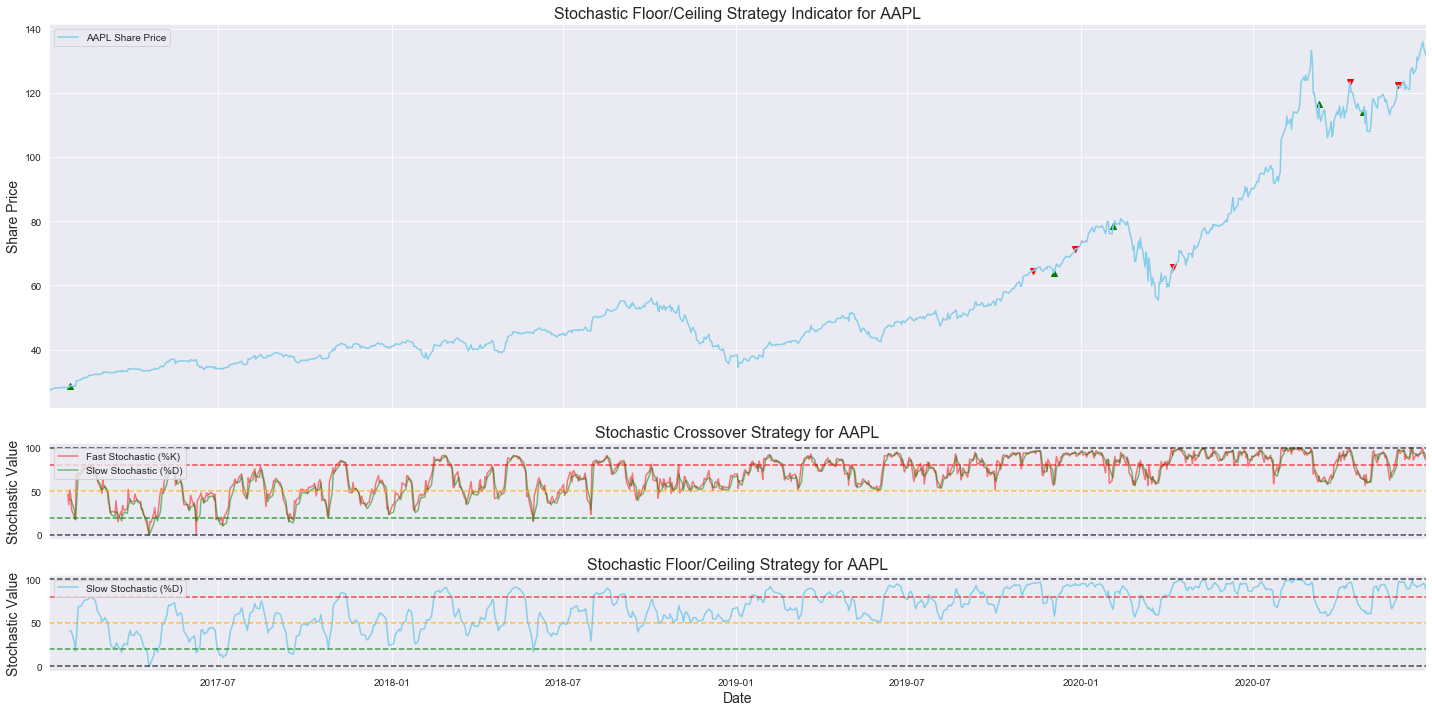

In [15]:
stochastic_oscillator = ta.stochastic_oscillator(data, ticker, highs, lows)

Now that we've done the technical analysis, we can get into some interesting more statistical modelling in the next module where we'll apply models such as GARCH, Markov Random Walks, Geometric Brownian Motions, Monte-Carlos, etc.

Inevitably you'll come across errors - feel free to ask me if you do come across any - this is far from perfect but so far it works.